<h1 style = "font-size:3rem;color:darkcyan"> Music genre classication - Train Model </h1>

In [59]:
# import libraries
import numpy as np
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt

In [60]:
# importing dataset (.json)
def import_dataset(dataset_path):
    
    # open json file
    with open(dataset_path, 'r') as f:
        data = json.load(f)
    
    # split list into different np arrays
    
    mappings = np.array(data['mappings']) 
    inputs = np.array(data['MFCC'])
    targets = np.array(data['labels'])
    filenames = np.array(data['filenames'])
    
    return mappings, inputs, targets, filenames

In [61]:
mappings, inputs, targets, filenames = import_dataset('data.json')

In [62]:
mappings

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

In [63]:
inputs.shape

(9981, 130, 13)

In [64]:
# split the data

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.3)

In [65]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [inputs.shape[1], inputs.shape[2]]),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(len(mappings), activation = 'softmax')
])

In [66]:
# compile model
learning_rate = 0.0001
optimiser = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer = optimiser, 
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [68]:
# train network
model.fit(x_train, y_train, 
          validation_data = (x_test,y_test),
          epochs = 50,
          batch_size = 32)

Epoch 1/50
219/219 [==============================] - 1s 5ms/step - loss: 7.2276 - accuracy: 0.2242 - val_loss: 2.3109 - val_accuracy: 0.1710
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 2.1394 - accuracy: 0.2385 - val_loss: 2.1622 - val_accuracy: 0.2654
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 2.0150 - accuracy: 0.2913 - val_loss: 2.1146 - val_accuracy: 0.2728
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 1.9260 - accuracy: 0.3148 - val_loss: 2.2712 - val_accuracy: 0.2768
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 1.9027 - accuracy: 0.3262 - val_loss: 2.0678 - val_accuracy: 0.2778
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 1.8619 - accuracy: 0.3486 - val_loss: 2.1510 - val_accuracy: 0.2491
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 1.8124 - accuracy: 0.3759 - val_loss: 2.0426 - val_accuracy: 0.3249
Epoch 

In [69]:
# evaluate model
print('Model evaluation: ')
model.evaluate(x_test, y_test, verbose = True)

Model evaluation: 
94/94 [==============================] - 0s 1ms/step - loss: 1.9375 - accuracy: 0.5693


[1.9375444650650024, 0.5692821145057678]

In [70]:
y_pred = model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [71]:
pred_classes = np.argmax(y_pred, axis=1)
pred_classes.shape

(2995,)

In [72]:
y_test.shape

(2995,)

In [73]:
mappings.shape

(10,)

In [74]:
# visualize confusion matrix

def plot_confusion_matrix(true_target, predicted_target, classes, normalize = None, cmap= 'PuBu', size = [6,6], fontsize=9):
    # get confusion matrix
    labels = np.arange(0,len(classes), 1)
    cm = sklearn.metrics.confusion_matrix(true_target, predicted_target, labels = labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Absolute Confusion Matrix'
        
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap= cmap)
    ax.figure.colorbar(im, ax=ax)
    
    
    # set labels ticks
    ticks = np.arange(cm.shape[1])
    ax.set(xticks=ticks,
           yticks=ticks,
           xticklabels=classes, 
           yticklabels=classes,
          )
    
    ax.set_title(title, fontsize = 20)
    ax.set_ylabel('True Class', fontsize = fontsize)
    ax.set_xlabel('Predicted Class', fontsize = fontsize)
     
    # style tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize)
    plt.setp(ax.get_yticklabels(), ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize)
    
    # plot text annotation inside each segment
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize = fontsize)

    fig.tight_layout()
    plt.show()

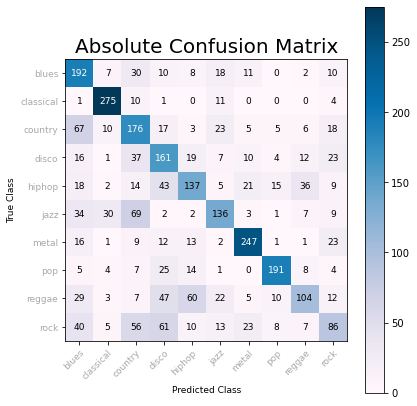

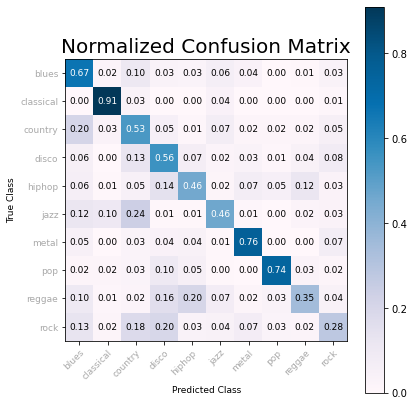

In [75]:
plot_confusion_matrix(y_test, pred_classes, classes = mappings, size = [6,6], normalize = False)
plot_confusion_matrix(y_test, pred_classes, classes = mappings, size = [6,6], normalize = True)